### 2023/02/12 統計手法を用いた異常検知のテスト

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import seaborn as sns
from scipy.stats import norm

In [2]:
box_abct_nopt = pd.read_pickle('../temp/20240117_box_abct_nopt_rmoverlapcoord.pkl')

In [8]:
# 教師データの作成
# 斎藤先生の線のうち、アウトライン描画段階のみに含まれるデータを、単純な線としてラベリングする
# 斎藤先生のアウトライン描画段階終了時刻
# 紙箱1回目：209
# 紙箱2回目：150
# 紙箱3回目：197
# 紙袋1回目：279
t_name = 'saito'
box_t_1_outline = box_abct_nopt[box_abct_nopt['motif'] == '紙箱'].query('name == "saito"').query('times == 1').query('time <= 209')
box_t_2_outline = box_abct_nopt[box_abct_nopt['motif'] == '紙箱'].query('name == "saito"').query('times == 2').query('time <= 150')
box_t_3_outline = box_abct_nopt[box_abct_nopt['motif'] == '紙箱'].query('name == "saito"').query('times == 3').query('time <= 197')

box_t_1_outline_sid_end = box_t_1_outline[-2:-1] # 955_522
box_t_2_outline_sid_end = box_t_2_outline[-2:-1] # 956_300
box_t_3_outline_sid_end = box_t_3_outline[-2:-1] # 957_277

simple_shape = pd.concat([box_t_1_outline, box_t_2_outline, box_t_3_outline], axis=0)
input_data = simple_shape.copy()[100:150]
input_nparray = np.array([np.array(nparr) for nparr in input_data['cos_sim'].to_numpy()])

##### ▶カーネル密度推定

952
792322


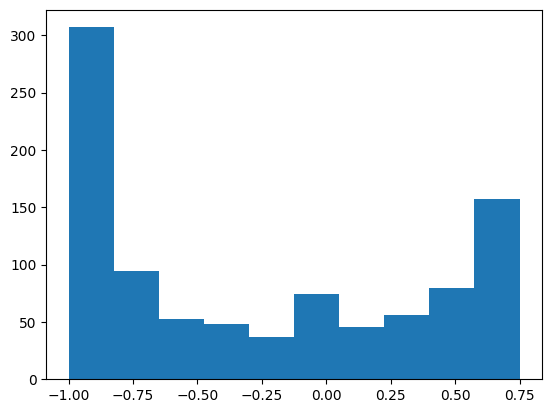

In [15]:
cos_sims = [ cos_sim for cos_sim in simple_shape['cos_sim']]
all_cossim = []
for cos_sim in cos_sims:
    for value in cos_sim:
        all_cossim.append(value)

cossim_under075 = [value for value in all_cossim if value <= 0.75]

# カーネル密度推定
# h = 1
# n = len(all_cossim)

# # 確率密度関数描画用のx軸データ
# x = np.linspace(0, 20, 1000)

# # 確率密度関数の値を取得
# ys = []
# for x_i in all_cossim:
#     ys.append(norm.pdf(x, loc=x_i, scale=h) / n)

# fig, ax = plt.subplots()
# for i in range(len(ys)):
#     ax.plot(x, ys[i], 'k--', linewidth=0.5)
# ax.set_xlim(0, 17.5)
# ax.set_ylim(0, 0.2)
# ax.set_xticks(all_cossim)
# ax.set_xlabel('x')

# ヒストグラム
plt.hist(cossim_under075)

print(len(cossim_under075))

print(len(all_cossim))

##### ▶k-shape

In [10]:
from tslearn.clustering import KShape

ks = KShape(n_clusters=2, max_iter=100, n_init=100, verbose=0)
ks.fit(input_nparray)
y_pred = ks.fit_predict(input_nparray)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


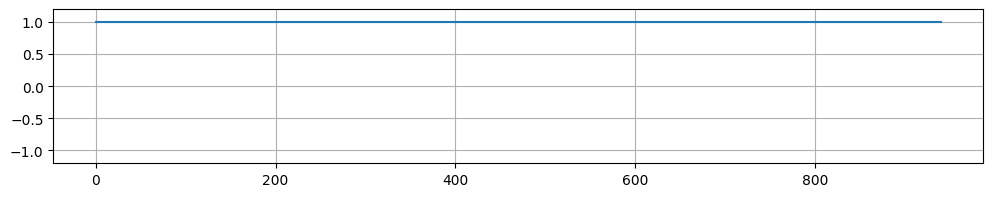

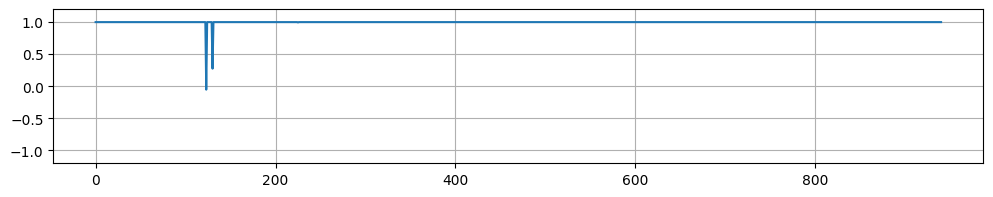

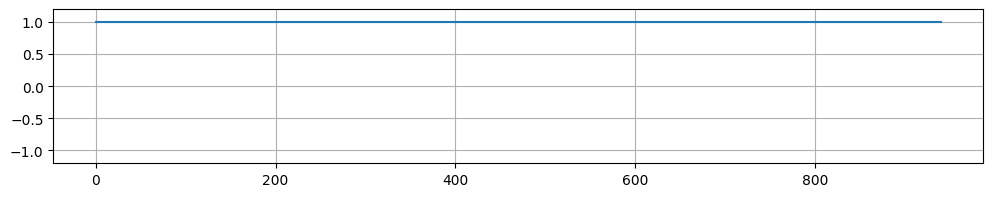

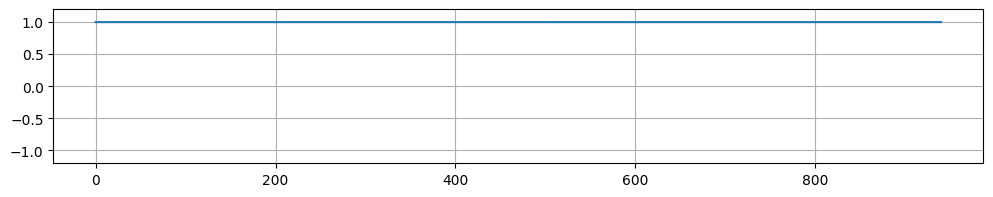

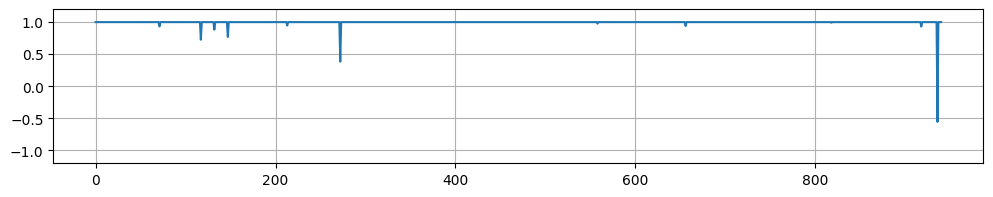

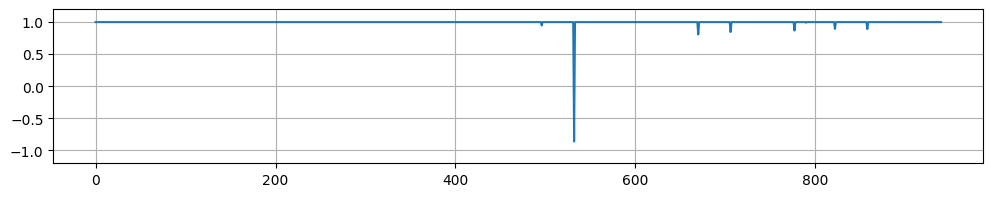

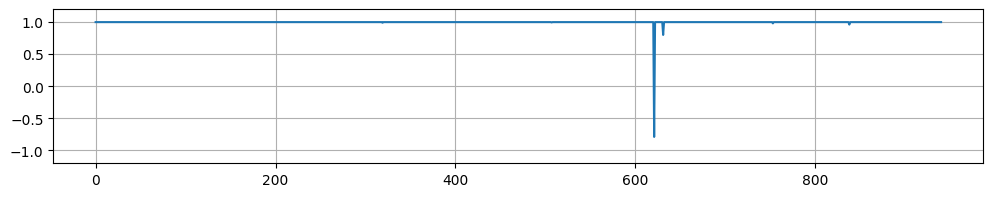

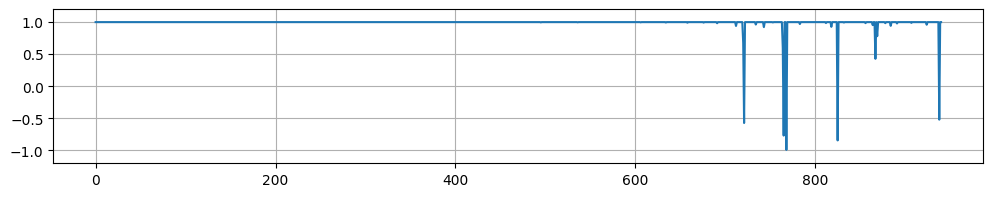

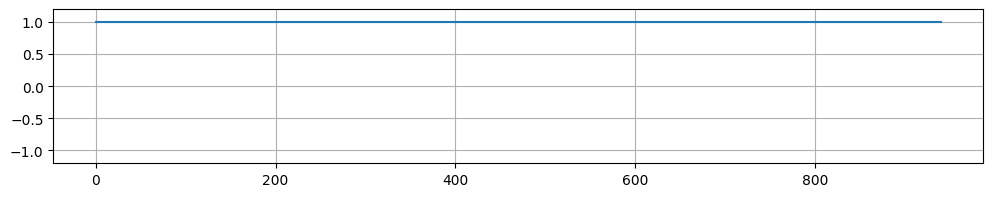

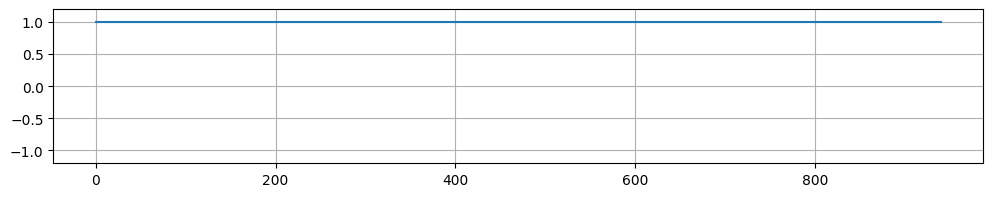

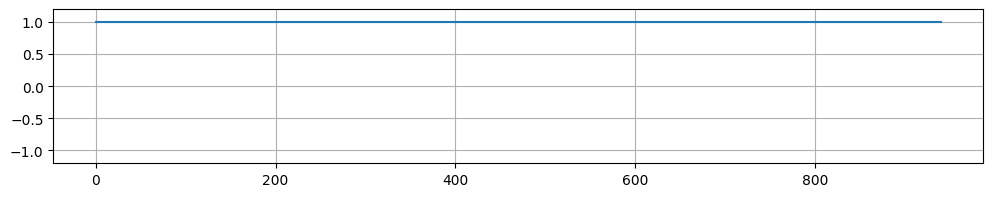

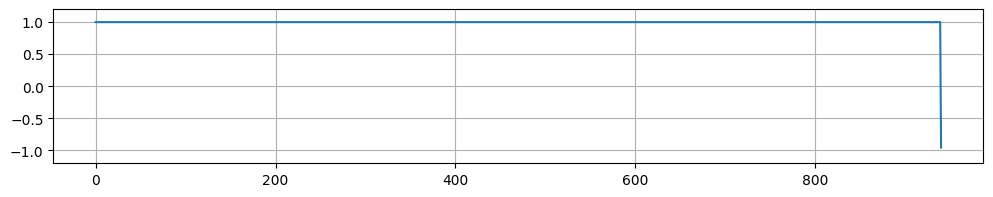

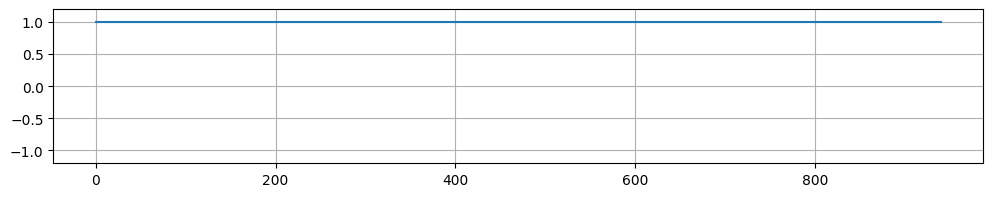

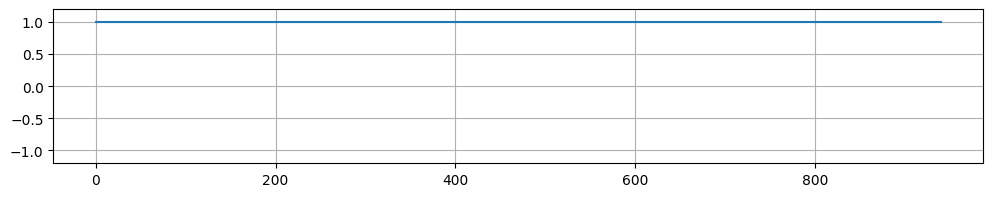

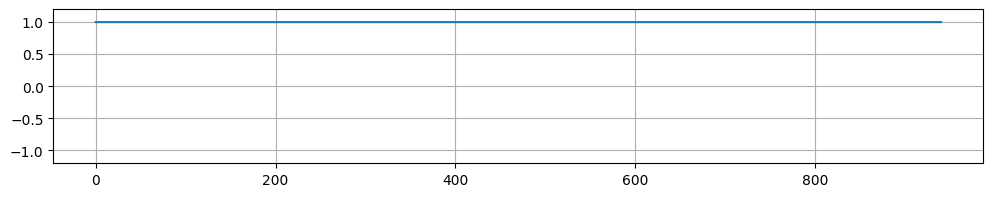

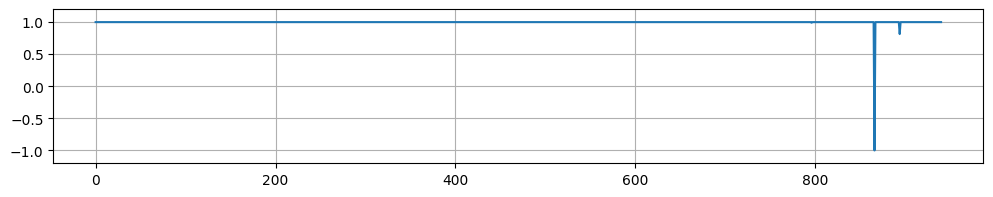

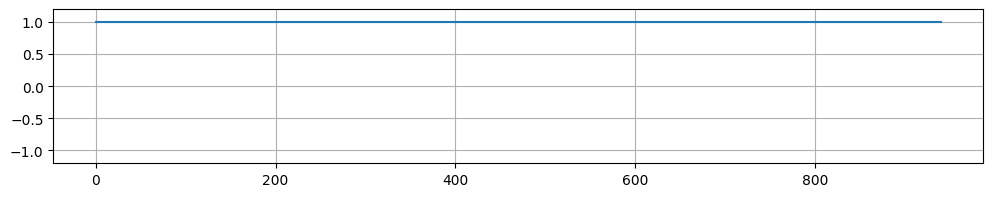

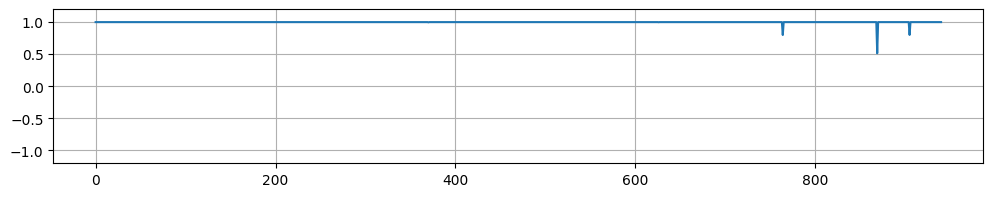

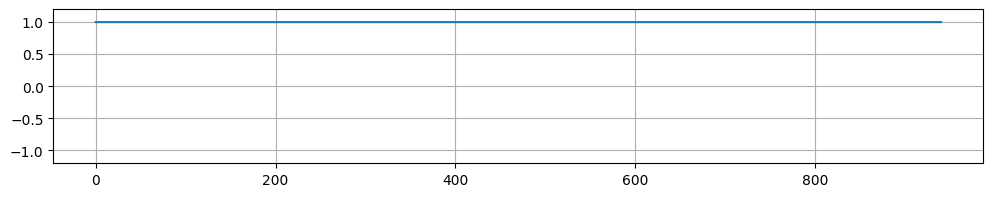

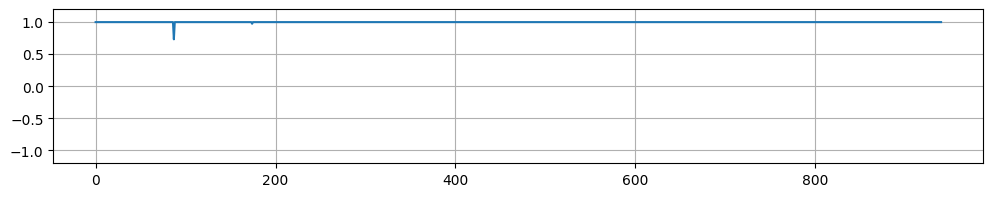

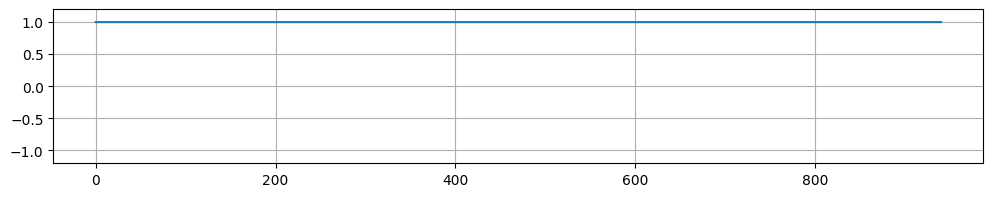

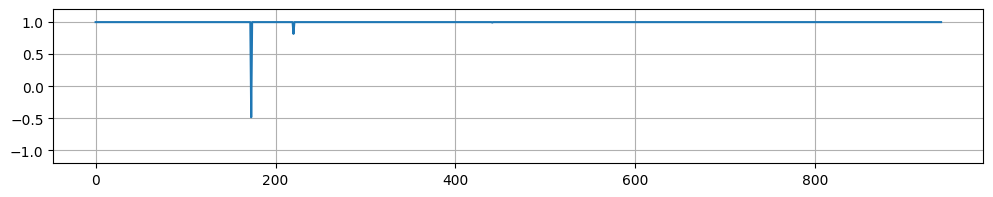

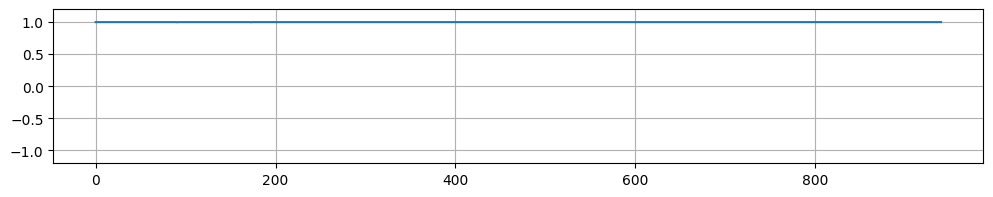

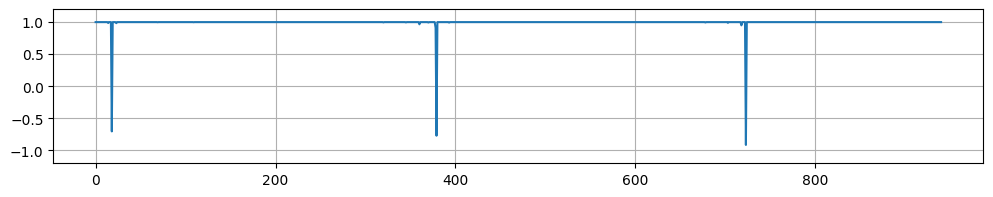

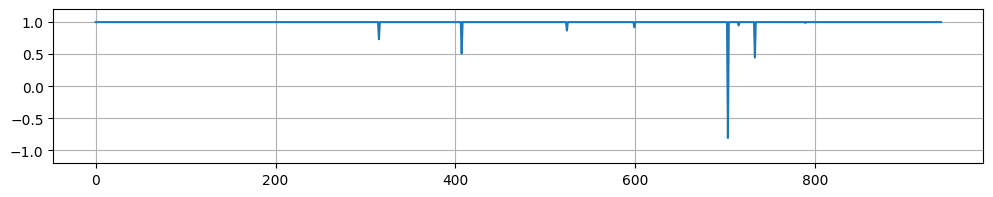

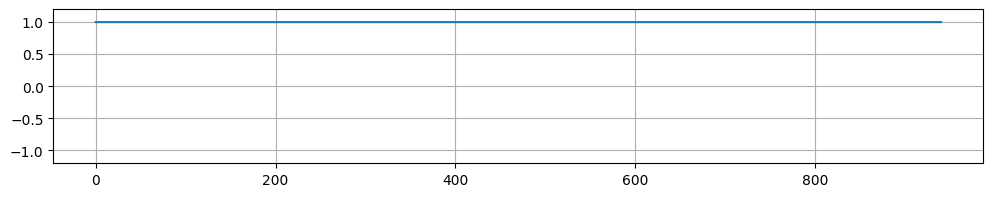

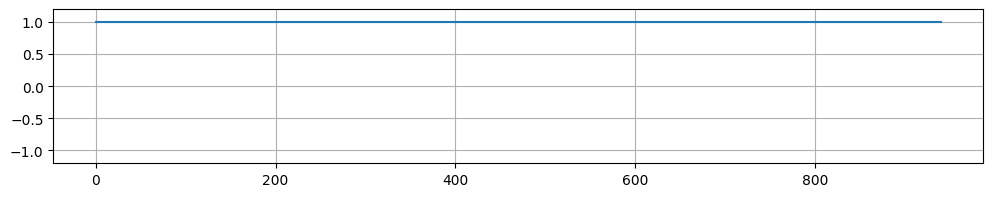

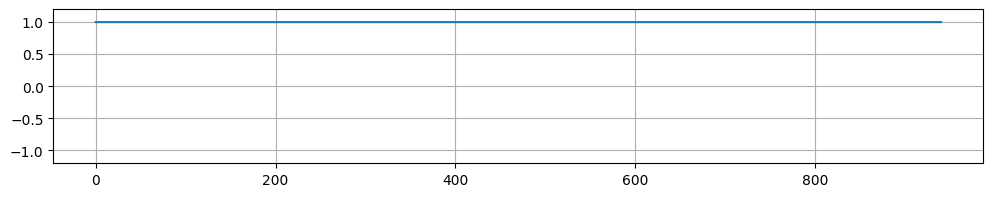

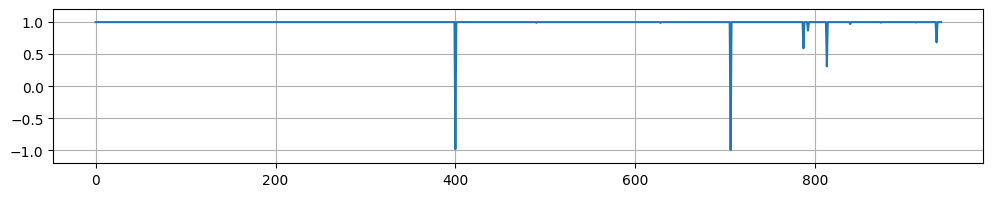

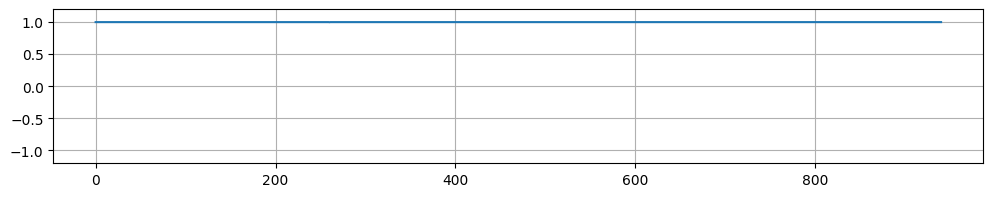

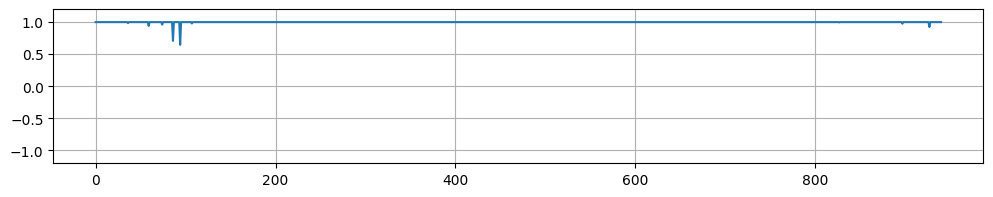

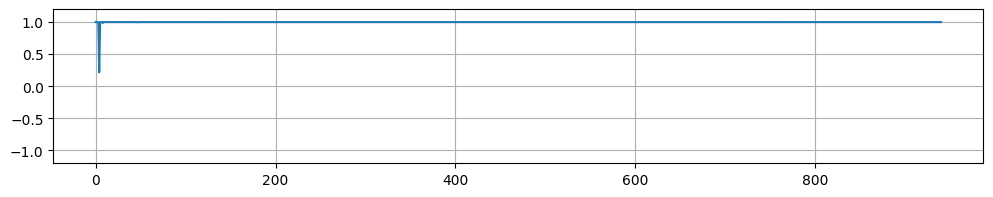

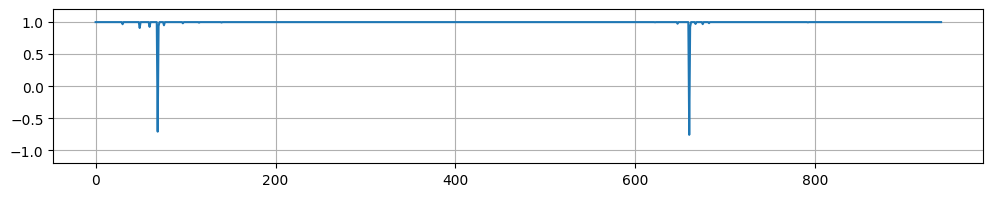

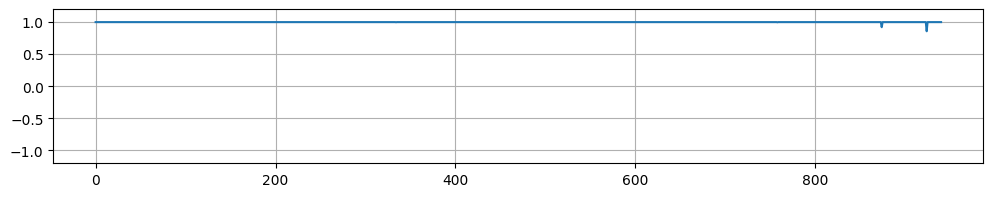

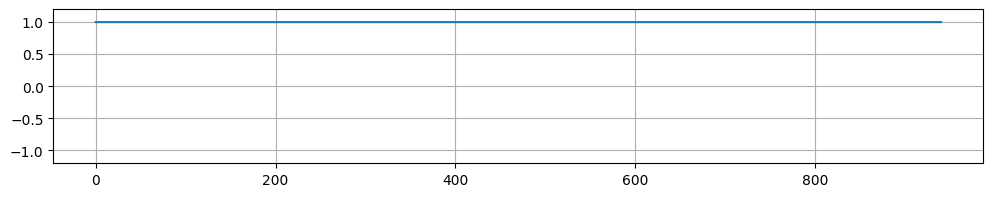

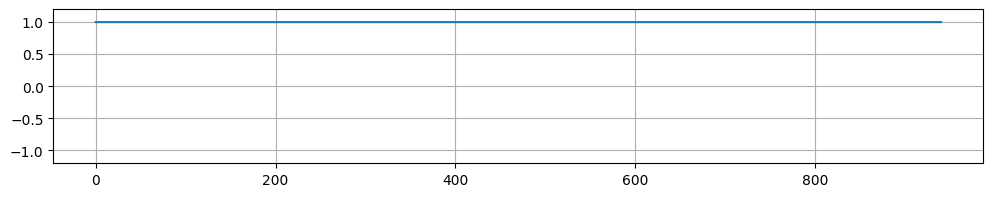

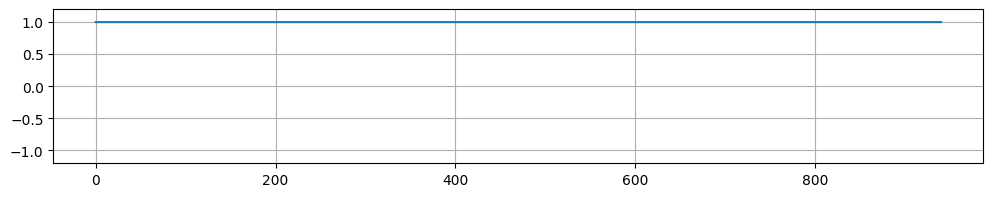

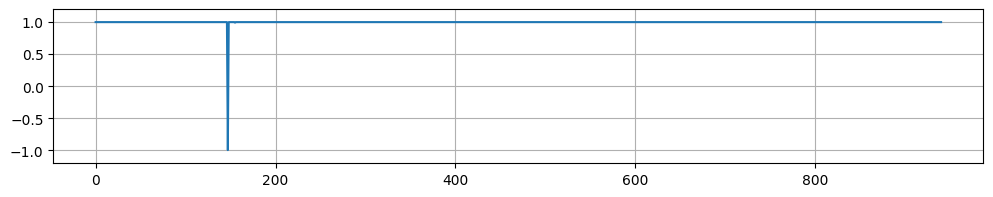

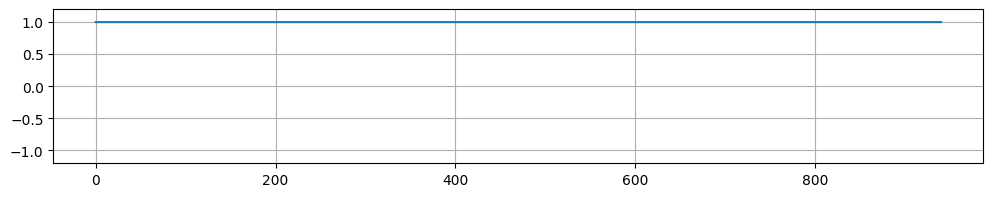

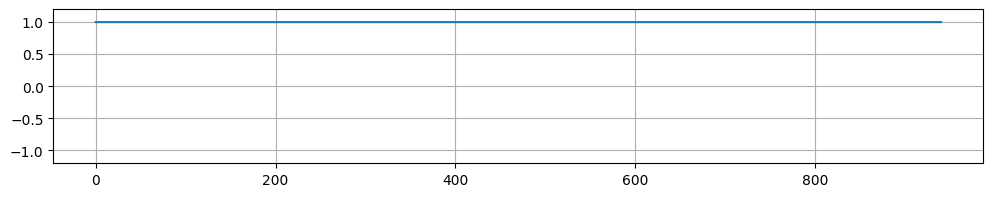

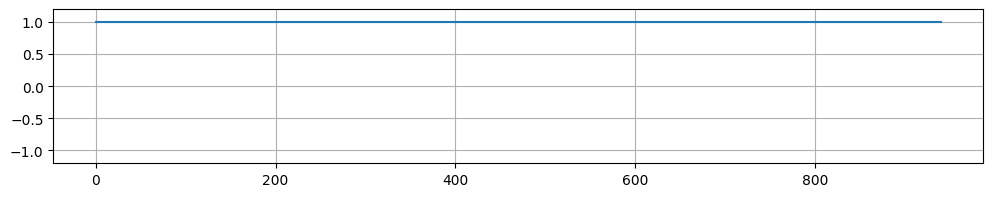

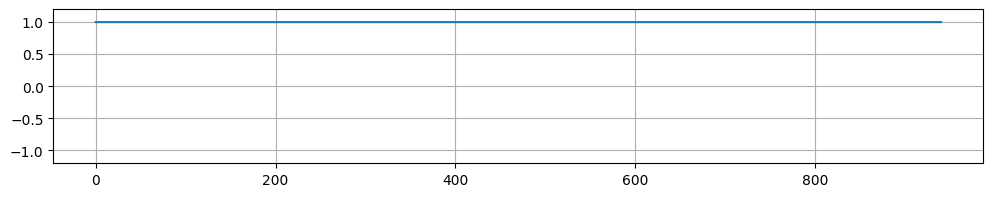

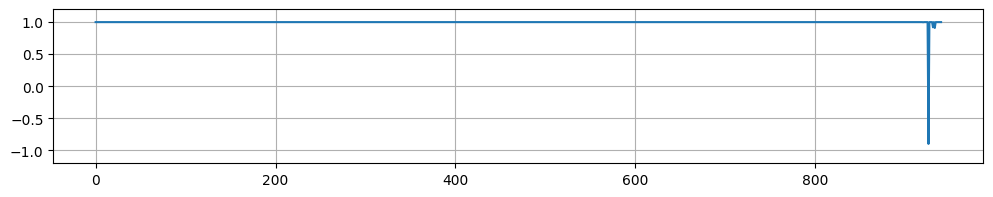

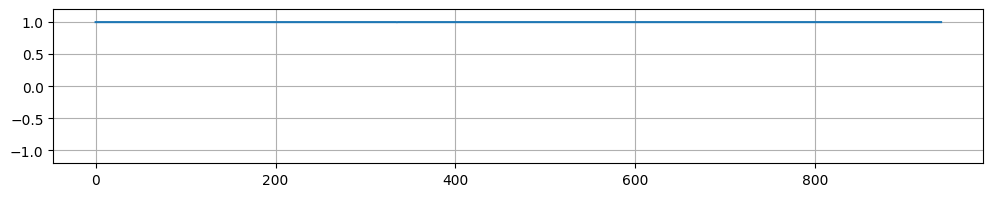

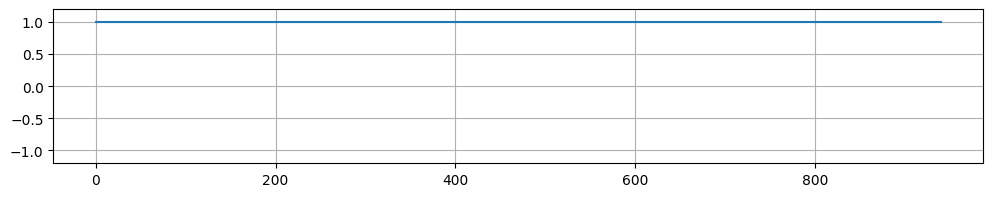

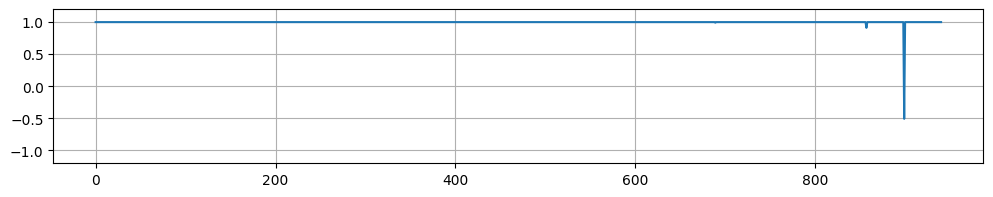

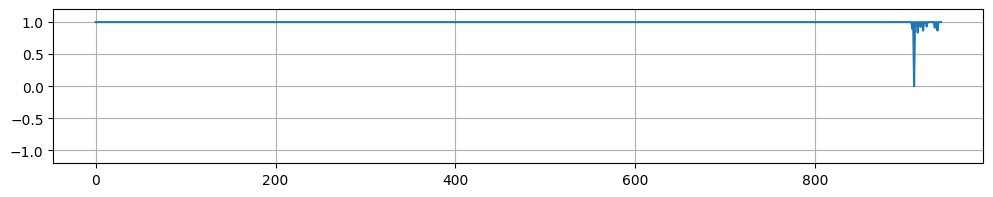

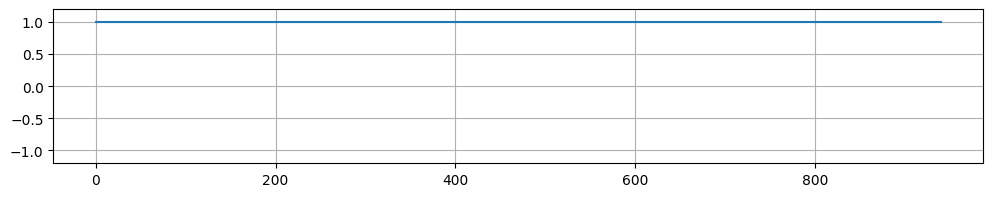

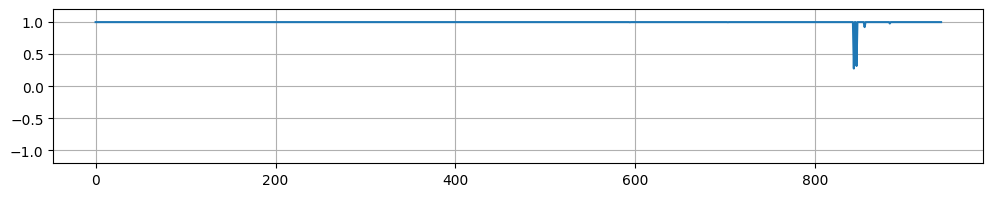

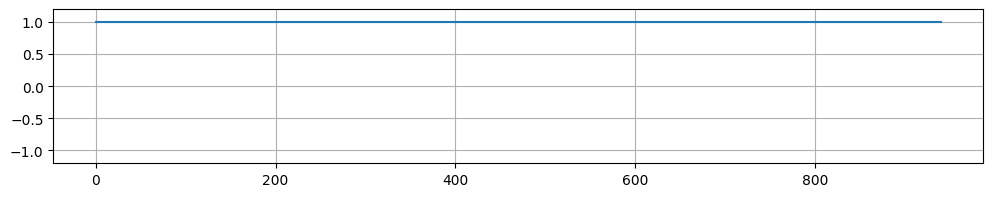

In [15]:
for cossim in input_nparray:
    plt.figure(figsize=(12,2))
    plt.ylim([-1.2, 1.2])
    plt.plot(range(len(cossim)), cossim)
    plt.grid()
    plt.show()
    plt.close()